<a href="https://colab.research.google.com/github/winee165/Prediction-of-Diabeties/blob/branch_1/Diabeties_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
columnnames=["preg","plas","pres","skin","test","mass","pedi","age","class"]
df = pd.read_csv("/content/pima-indians-diabetes.csv",names=columnnames)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.groupby(["class"]).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


Notice that the amount of data (per class) is in the ratio 1:2. This unevenness causes bias in model and should be handeled for better accuracy.

In [ ]:
df.notnull().count()

preg     768
plas     768
pres     768
skin     768
test     768
mass     768
pedi     768
age      768
class    768
dtype: int64

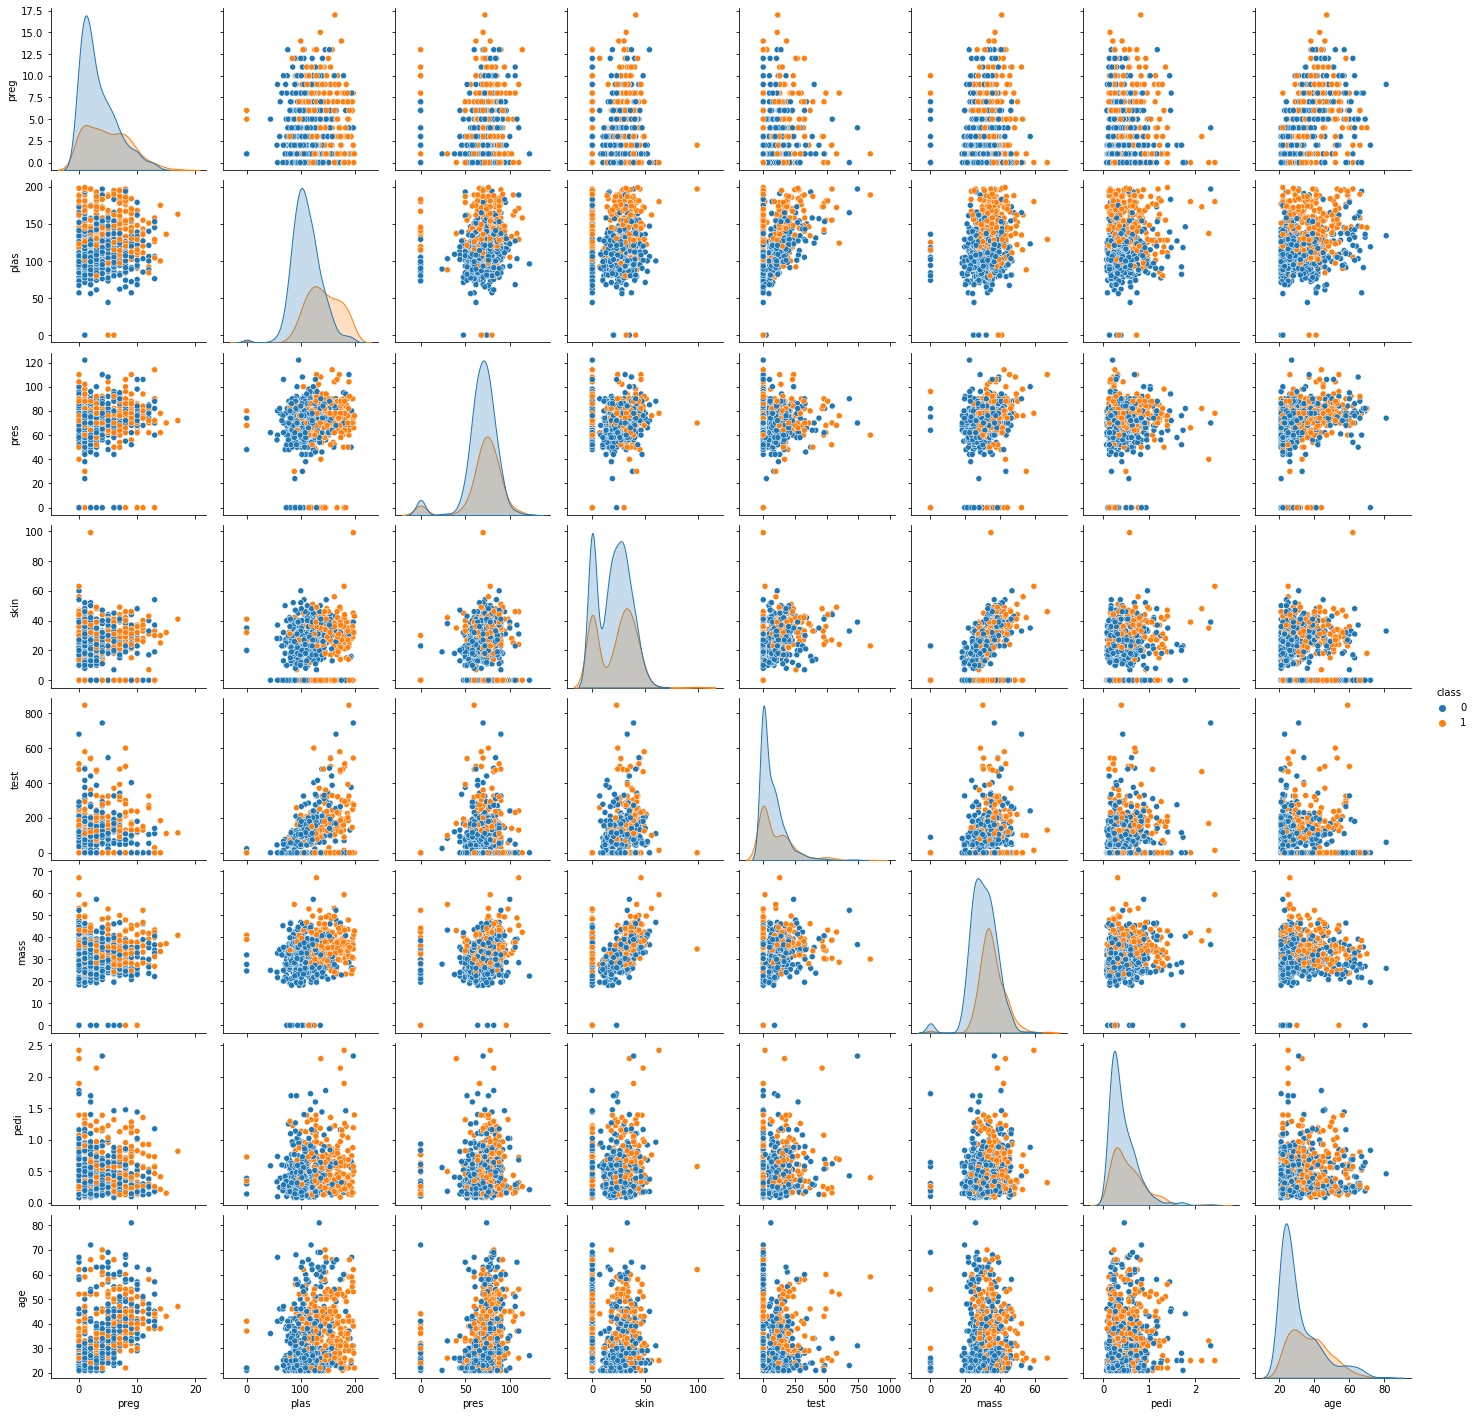

In [ ]:
sns.pairplot(df,hue="class",diag_kind='kde')

In [ ]:
array=df.values
X=array[:,0:8]
Y=array[:,8]
test_size=0.30
seed=7

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = test_size, random_state=seed)

In [ ]:
type(X_test)

numpy.ndarray

## Create Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
Y_predict=model.predict(X_test)

In [ ]:
model_score=model.score(X_test,Y_test)
model_score

0.7489177489177489

In [ ]:
metrics.confusion_matrix(Y_test,Y_predict)

array([[127,  20],
       [ 38,  46]])

In [ ]:
import pickle

In [ ]:
regressor=LogisticRegression()
regressor.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pickle.dump(regressor, open('model.pkl','wb'))

In [ ]:
modell= pickle.load(open('model.pkl','rb'))

In [ ]:
print(model.predict([[6,100,	70	,35	,0	,34,	0.627,45]]))

[0.]
